In [ ]:
# Importing libraries 
import numpy as np 
import pandas as pd
import janitor

# !pip3 install pyjanitor # run this once

import sklearn 
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/mushrooms.csv')

In [ ]:
data.info() # We want to see the data types and how many null values do we have in the dataset.  

In [4]:
data = data.clean_names()

# Data viz
### Attribute information

    1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
    2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
    3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
    4. bruises?: bruises=t,no=f
    5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
    6. gill-attachment: attached=a,descending=d,free=f,notched=n
    7. gill-spacing: close=c,crowded=w,distant=d
    8. gill-size: broad=b,narrow=n
    9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, 
    white=w,yellow=y
    10. stalk-shape: enlarging=e,tapering=t
    11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
    16. veil-type: partial=p,universal=u
    17. veil-color: brown=n,orange=o,white=w,yellow=y
    18. ring-number: none=n,one=o,two=t
    19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
    21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
    22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d 

# Descriptive Statistics
###  Is there a relation between stalk properties and edibility ?

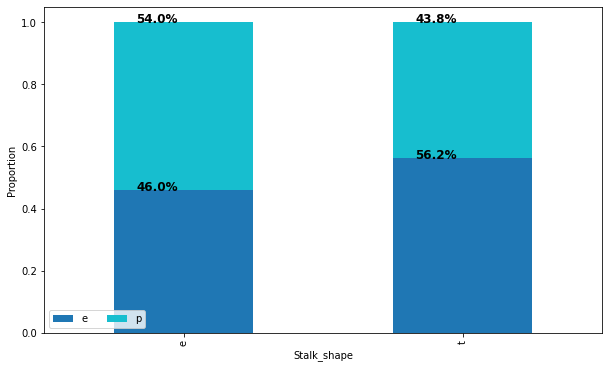

In [20]:
# Stalk_shape vs class

cross_tab_prop = pd.crosstab(index=data['stalk_shape'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Stalk_shape")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks

### Insight: 
   ##### We see that 54.0% of mushrooms with __enlarging__ stalk shape is poisonuos, and 43.8% of mushrooms with __tapering__ stalk shape is poisonuos.

In [22]:
data['stalk_shape'].value_counts()

t    4608
e    3516
Name: stalk_shape, dtype: int64

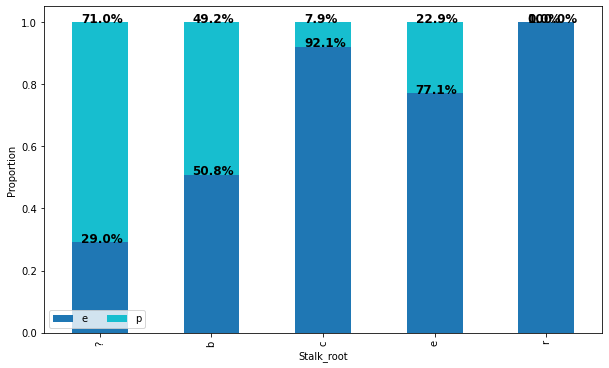

In [23]:
# Stalk_root vs class

cross_tab_prop = pd.crosstab(index=data['stalk_root'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Stalk_root")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks

### Insight: 
   ##### We see that if the mushroom has a __club__, __cup__, or __rooted__ stalk root, then there is a low chance for it to be poisonous. However, if the root is __bulbous__ then a chance of 49.2% is that the mushroom is poisonous. Moreover, in the dataset we have 2480 mushrooms with a __missing__ stalk root.


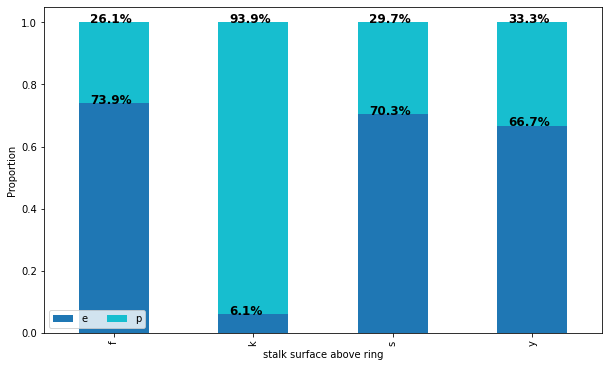

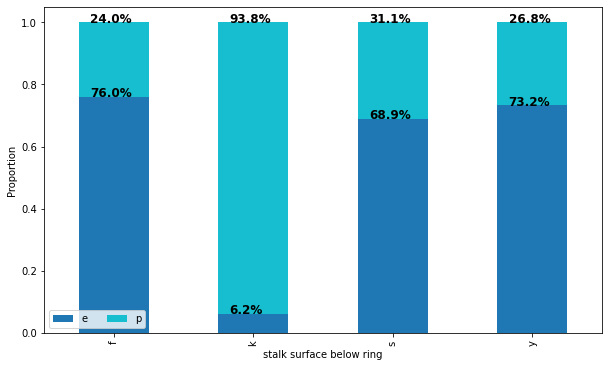

In [25]:
# Stalk_surface vs class

# stalk_surface_above_ring

cross_tab_prop = pd.crosstab(index=data['stalk_surface_above_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk surface above ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

# stalk_surface_below ring

cross_tab_prop = pd.crosstab(index=data['stalk_surface_below_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk surface below ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks


### Insight: 
   ##### For the stalk surface, we see that the percentage are similar for above & below ring. __Fibrous__, __smooth__, and __scaly__ mushorooms have an average possibility of being poisonous as 25.1%, 30.4%, and 30.1%, respectively. However, __silky__ mushrooms have an average possibility of 93.9% for being poisonuous.
   #### The dataset contains:
      1- 2372 mushrooms with silky stalk surface above ring.
      2- 2304 mushrooms with silky stalk surface below ring.
      3- 1800 mushrooms with silky stalk surface above and below ring.


In [28]:
data['stalk_surface_above_ring'].value_counts()

s    5176
k    2372
f     552
y      24
Name: stalk_surface_above_ring, dtype: int64

In [36]:
data['stalk_surface_below_ring'].value_counts()

s    4936
k    2304
f     600
y     284
Name: stalk_surface_below_ring, dtype: int64

In [51]:
da2 = data[(data['stalk_surface_above_ring'] == 'k') & (data['stalk_surface_below_ring'] == 'k')]
da2.shape[0]


1800

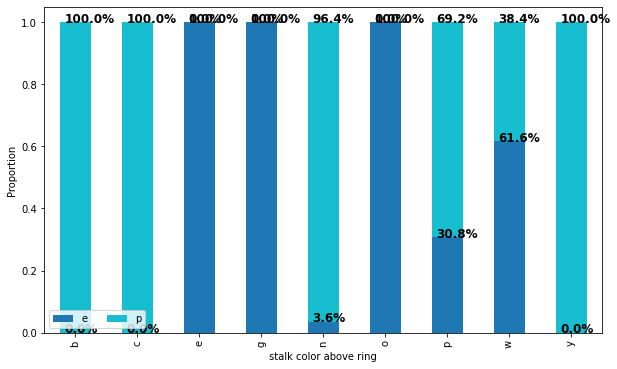

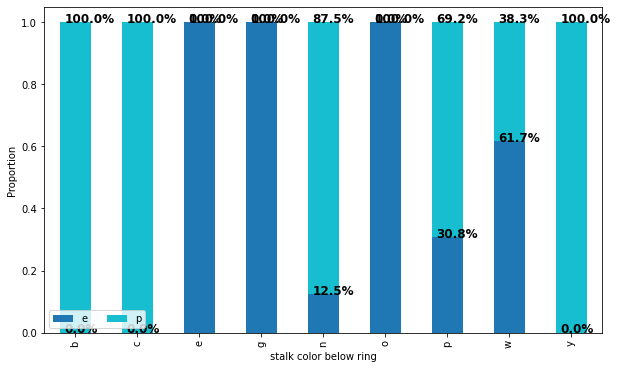

In [44]:
# Stalk_color vs class

# stalk_color_above_ring

cross_tab_prop = pd.crosstab(index=data['stalk_color_above_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk color above ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

# stalk_surface_below ring

cross_tab_prop = pd.crosstab(index=data['stalk_color_below_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk color below ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks


### Insight: 
   ##### For the stalk color, we see that the percentage are similar for above & below ring. Mushrooms with these stalk colors: __buff__, __cinnamon__, and __yellow__ either above or below ring, have 100% percentage of being poisonous. On the other hand, mushrooms with these stalk colors: __red__, __gray__, and __orange__ either above or below ring, have 0% percentage of being poisonous. Also, 38.3% of white colored stalk mushrooms are poisonous, and 69.2% of pink colored stalk mushrooms are poisonous, and brown colored stalk mushrooms have an average percentage of 92.0% for being poisonous.
   ##### Notes: in this dataset,
      1- There are only 8 yellow, 36 cinnamon for stalk color above the ring.
      2- There are only 24 yellow, 36 cinnamon for stalk color below the ring.
      3- Also, the 36 cinnamon stalk colored mushrooms have both cinnamon color above and below ring.


In [46]:
data['stalk_color_above_ring'].value_counts()

w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: stalk_color_above_ring, dtype: int64

In [47]:
data['stalk_color_below_ring'].value_counts()

w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: stalk_color_below_ring, dtype: int64

In [53]:
da3 = data[(data['stalk_color_above_ring'] == 'b') & (data['stalk_color_below_ring'] == 'b')]
da3.shape[0]

144